# Contents <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Análisis exploratorio de datos](#data_review)
    * [Conclusions](#data_review_conclusions)
    * [2.3 Tipos de Datos](#type_data)
* [Etapa 2. Segmentar los datos](#seg_data)
* [Etapa 3. Desarrollo del modelo](#hypotheses)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
En este proyecto, la tarea es desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra. Se Tiene acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos. Para esta tarea de clasificación se debe crear un modelo que escoja el plan correcto y desarrollar un modelo con la mayor exactitud posible(umbral de exactitud es 0.75). Usaremos el dataset para comprobar la exactitud.
### Objetivo: 
Desarrollar un modelo: 
1. Que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra. 

### Etapas 
El proyecto consistirá en dos etapas:
 1. Examinar los datos
 2. Segmentar los datos
 3. Desarrollo del modelo
 
[Volver a Contenidos](#back)

## Etapa 1. Análisis exploratorio de datos <a id='data_review'></a>

Abrir los datos y examinarlos.

Necesitaremos varias librerías durante todo el proyecto así que vamos a importarlas.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

Leemos el archivo `users_behavior.csv` de la carpeta `/datasets/` y guardamos en la variable `df`:

In [4]:
# leyendo el archivo y almacenándolo en df
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Imprimimos las 10 primeras filas de la tabla

In [5]:
# obteniendo las 10 primeras filas de la tabla df
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


<AxesSubplot: ylabel='Frequency'>

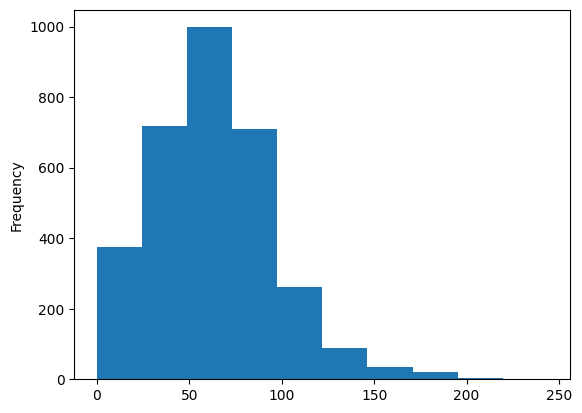

In [6]:
df['calls'].plot(kind='hist')

Para la variable `calls`, el histograma nos dice que los usuarios tienen alrededor de 50 y 75 llamadas mensuales.

<AxesSubplot: ylabel='Frequency'>

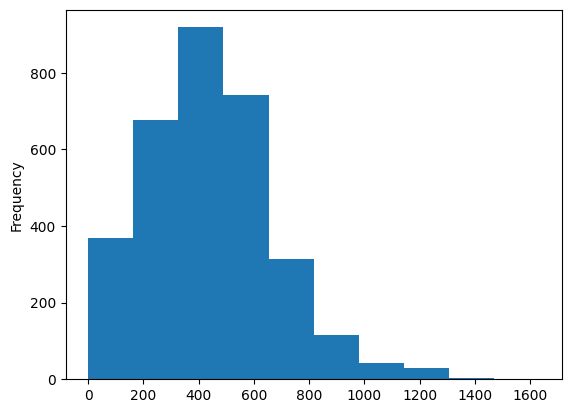

In [7]:
df['minutes'].plot(kind='hist')

Para la variable `minutes`, el histograma nos dice que los usuarios utilizan en promedio 420 minutos mensuales.

<AxesSubplot: ylabel='Frequency'>

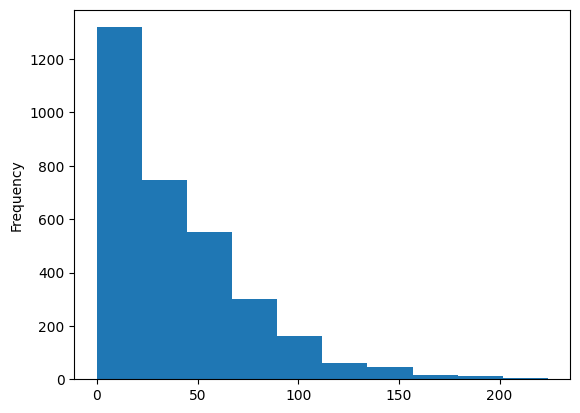

In [8]:
df['messages'].plot(kind='hist')

Para la variable `messages`, el histograma se concentra en el lado izquierdo del gráfico, con lo cual podemos decir que los usuarios utilizan entre 0 y 20 mensajes mensuales.

<AxesSubplot: ylabel='Frequency'>

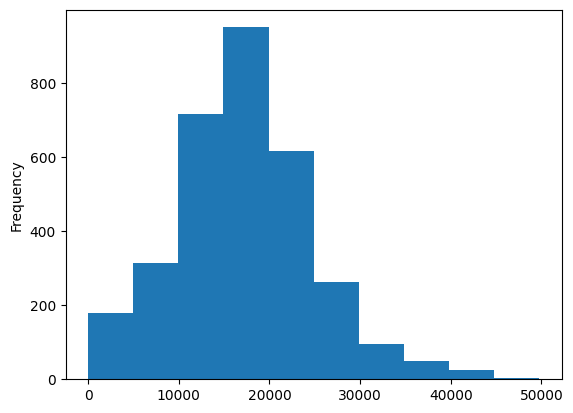

In [9]:
df['mb_used'].plot(kind='hist')

Para la variable `mb_used`, la distribución de valores se concentra entre 15000 y 20000 megas al mes.

<AxesSubplot: xlabel='is_ultra'>

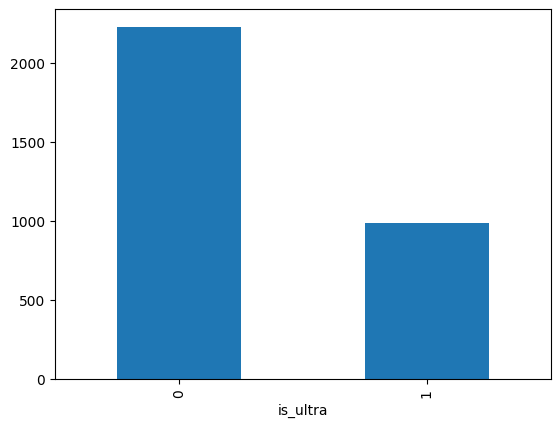

In [10]:
df.groupby('is_ultra')['is_ultra'].count().plot(kind='bar')

La variable `is_ultra` muestra claramente que en nuestro dataset los usuarios Smart predominan sobre los usuarios Ultra, casi el doble.

           count       mean        std  min   25%   50%    75%    max
is_ultra                                                             
0         2229.0  58.463437  25.939858  0.0  40.0  60.0   76.0  198.0
1          985.0  73.392893  43.916853  0.0  41.0  74.0  104.0  244.0


Text(0.5, 1.0, 'Llamadas por plan')

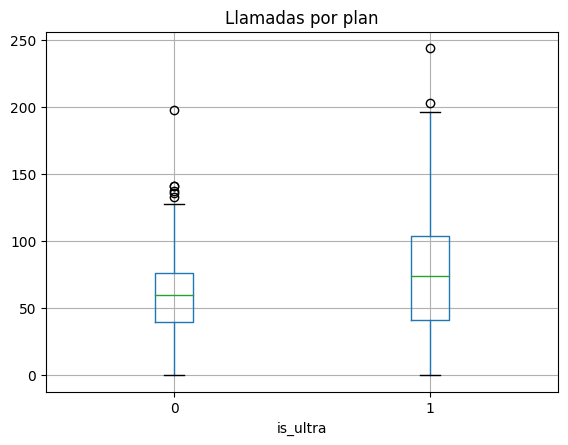

In [11]:
print(df.groupby('is_ultra')['calls'].describe())
df.boxplot(column='calls', by='is_ultra')
plt.suptitle('')
plt.title('Llamadas por plan')

           count        mean         std  min     25%     50%     75%      max
is_ultra                                                                      
0         2229.0  405.942952  184.512604  0.0  274.23  410.56  529.51  1390.22
1          985.0  511.224569  308.031100  0.0  276.03  502.55  730.05  1632.06


Text(0.5, 1.0, 'Minutos por plan')

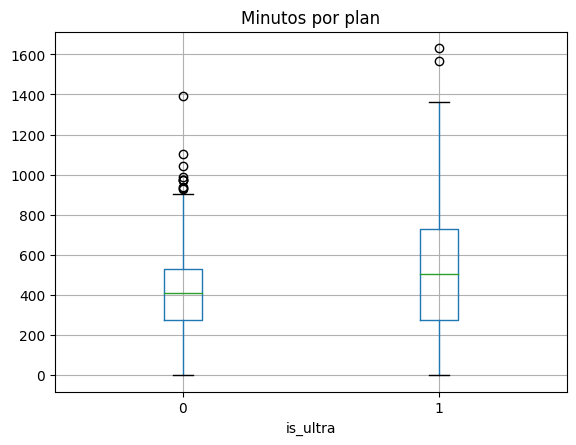

In [12]:
print(df.groupby('is_ultra')['minutes'].describe())
df.boxplot(column='minutes', by='is_ultra')
plt.suptitle('')
plt.title('Minutos por plan')

           count          mean           std  min       25%       50%  \
is_ultra                                                                
0         2229.0  16208.466949   5870.498853  0.0  12643.05  16506.93   
1          985.0  19468.823228  10087.178654  0.0  11770.28  19308.01   

               75%       max  
is_ultra                      
0         20043.06  38552.62  
1         26837.72  49745.73  


Text(0.5, 1.0, 'Megas por plan')

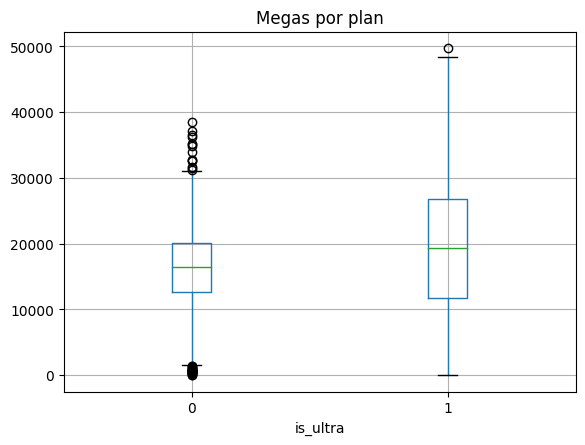

In [13]:
print(df.groupby('is_ultra')['mb_used'].describe())
df.boxplot(column='mb_used', by='is_ultra')
plt.suptitle('')
plt.title('Megas por plan')

Revisando las descripciones númericas de los datos junto a los boxplots, podemos notar que las desviaciones estándar son casi el doble para los usuarios Ultra, esto quiere decir que los valores se han distribuido de manera diferente para cada plan, siendo el plan Smart que se concentra en valores más pequeños que el plan Ultra, mientras que en el plan Ultra el boxplot es más largo que Smart, lo que indica que los valores están mucho más repartidos entre los usuarios del plan Ultra.

## Etapa 2. Segmentar los datos <a id='data_review'></a>
Vamos a segmentar los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba. Para esto, necesitaremos la función llamada 'train_test_split', la cual importaremos desde el módulo 'model_selection' de scikit-learn.

Como el conjunto de prueba no existe. En ese caso los datos fuente deben dividirse en tres partes: entrenamiento, validación y prueba. Usualmente, el tamaño del conjunto de validación y del de prueba son iguales. Esto da como resultado una proporción de datos fuente de 3:1:1, se requiere un enfoque correcto para segmentar correctamente, por eso usaremos dos veces la función train_test_split, la primera para hallar el conjunto de entrenamiento (60% de los datos) con un test_size de 0.40 y luego usaremos el 40% restante para hallar el conjunto de validación y de prueba con un test_size de 0.50.

In [14]:
#separamos los datos en entrenamiento, validación y prueba
df_train, df_valid_test = train_test_split(df, test_size=0.40, random_state=12345)
df_valid, df_test = train_test_split(df_valid_test, test_size=0.50, random_state=12345)

In [15]:
#declaramos variables para las características y para la característica objetivo
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

In [16]:
#Hallando los tamaños de las tablas
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


## Etapa 3. Desarrollo del modelo<a id='data_review'></a>

Vamos a investigar la calidad de diferentes modelos cambiando los hiperparámetros.

Para nuestro primer modelo usaremos el **árbol de decisión**, necesitaremos importar la clase **DecisionTreeClassifier** del módulo **tree** de la librería **sklearn**. Este modelo contiene un parámetro random_state que sirve para añadir pseudoaleatoriedad al crear un algoritmo de aprendizaje y un hiperparámetro max_depth que controla la profundidad máxima del árbol.

In [17]:
#creamos un bucle para max_depth de 1 a 5
for depth in range(1, 6):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1.fit(features_train, target_train)
    predictions_valid = model_1.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7791601866251944
max_depth = 5 : 0.7791601866251944


Para nuestro segundo modelo usaremos el **bosque aleatorio**, necesitaremos importar la clase **RandomForestClassifier** del módulo **ensemble** de la librería **sklearn**. Este modelo contiene un parámetro ***random_state*** que sirve para añadir pseudoaleatoriedad al crear un algoritmo de aprendizaje y un hiperparámetro ****n_estimators*** que establece el número de árboles en el bosque.

In [18]:
#creamos un bucle que pruebe modelos de bosque aleatorio con varios números de estimadores (árboles)
best_model = None
best_score = 0
best_est = 0
best_depth = 0
#seleccionamos el rango del hiperparámetro
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2 = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        model_2.fit(features_train, target_train) #entrenamos el modelo en el conjunto de entrenamiento
        score = model_2.score(features_valid, target_valid) #calculamos la puntuación de accuracy en el conjunto de validación
        if score > best_score:
            best_model = model_2
            best_score = score #guardamos la mejor puntuación de accuracy en el conjunto de validación
            best_est = est #guardamos el número de estimadores que corresponden a la mejor puntuación de accuracy
            best_depth = depth #guardamos la profundidad máxima que corresponden a la mejor puntuación de accuracy
        
print("Accuracy del mejor modelo en el conjunto de validación", best_score, "n_estimators:", best_est, "best_depth:", depth)

Accuracy del mejor modelo en el conjunto de validación 0.8055987558320373 n_estimators: 40 best_depth: 10


Guardamos el segundo modelo con otra variable para poderla usarla más adelante sin necesidad de volver a entrenarla.

In [19]:
#la mejor exactitud para nuestro segundo modelo es con n_estimators=40 y 40 max_depth= 10
final_model_2 = best_model
print(final_model_2.score(features_valid, target_valid))

0.8055987558320373


Para nuestro último modelo usaremos la **regresión logística**, necesitaremos importar la clase **LogisticRegression** del módulo **linear_model** de la librería **sklearn**. Este modelo contiene un parámetro ***random_state*** que sirve para añadir pseudoaleatoriedad al crear un algoritmo de aprendizaje, también necesitamos especificar un solver ***liblinear y lbfgs*** porque funcionan para diferentes casos, también probaremos con distintos valores para **penalty**.

In [20]:
# usamos las diferentes normas de penalty en solver: 'liblinear'
penal_liblinear = ['l1', 'l2']
for pnl in penal_liblinear: 
    #inicializamos el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
    model_3_liblinear = LogisticRegression(random_state=54321, solver='liblinear', penalty=pnl)
    #entrenamos el modelo en el conjunto de entrenamiento
    model_3_liblinear.fit(features_train, target_train)
    #calculamos la puntuación de accuracy en el conjunto de entrenamiento
    score_train_liblinear = model_3_liblinear.score(features_train, target_train)
    #calculamos la puntuación de accuracy en el conjunto de validación
    score_valid_liblinear = model_3_liblinear.score(features_valid, target_valid)
    print('penalty =', pnl, '- Accuracy entrenamiento: ', end='')
    print(score_train_liblinear)
    print('penalty =', pnl, '- Accuracy validación: ', end='')
    print(score_valid_liblinear)

penalty = l1 - Accuracy entrenamiento: 0.7531120331950207
penalty = l1 - Accuracy validación: 0.7573872472783826
penalty = l2 - Accuracy entrenamiento: 0.7505186721991701
penalty = l2 - Accuracy validación: 0.7589424572317263


In [21]:
# usamos las diferentes normas de penalty en solver: 'lbfgs'
penal_lbfgs = ['l2', 'none']
for pnl in penal_lbfgs: 
    #inicializamos el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
    model_3_lbfgs = LogisticRegression(random_state=54321, solver='lbfgs', penalty=pnl)
    #entrenamos el modelo en el conjunto de entrenamiento
    model_3_lbfgs.fit(features_train, target_train)
    #calculamos la puntuación de accuracy en el conjunto de entrenamiento
    score_train_lbfgs = model_3_lbfgs.score(features_train, target_train)
    #calculamos la puntuación de accuracy en el conjunto de validación
    score_valid_lbfgs = model_3_lbfgs.score(features_valid, target_valid)
    print('penalty =', pnl, '- Accuracy entrenamiento: ', end='')
    print(score_train_lbfgs)
    print('penalty =', pnl, '- Accuracy validación: ', end='')
    print(score_valid_lbfgs)    

penalty = l2 - Accuracy entrenamiento: 0.7131742738589212
penalty = l2 - Accuracy validación: 0.7107309486780715
penalty = none - Accuracy entrenamiento: 0.7531120331950207
penalty = none - Accuracy validación: 0.7558320373250389


c:\Users\joste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Para nuestro modelo de regresión logística, el que tiene la mayor exactitud es el modelo con solver igual a 'liblinear' y penalty igual a 'l2', que nos resultó con una exactitud de 0.759.

Encontramos de los tres modelos el que tiene la exactitud más alta, es decir, el modelo de mayor calidad es el segundo modelo(**RandomForest**) con hiperparámetro max_depth igual a 10 y n_estimator igual a 40 que nos da una exactitud de 0.806. Con respecto a los demás modelos no hay mucha diferencia en sus exactitudes.

Ahora vamos a comprobar la calidad del modelo usando el conjunto de prueba.

Ya que tenemos el modelo con la calidad más alta(**RandomForest**), tenemos que verificar la calidad del modelo con su respectivo conjunto de prueba.

In [22]:
#comprobando la calidad del modelo con features_test y target_test
predictions_test = final_model_2.predict(features_test)
print('accuracy de:', accuracy_score(target_test, predictions_test))

accuracy de: 0.8055987558320373


Al comprobar con el conjunto de prueba en el modelo más optimo(**RandomForest**), la exactitud nos sale 0.806 que es exactamente igual al valor que nos salió con el conjunto de validación. Otro criterio importante a tener en cuenta , la velocidad de ejecución, al tratarse de un modelo bosque aleatorio la velocidad de ejecución es la más alta con respecto a los demás modelos, pero para este proyecto el mejor criterio que tenemos es el de tener la mayor exactitud posible por lo que comprobamos que el modelo elegido es el de mayor calidad.]

Finalmente realizaremos una prueba de cordura al modelo con el **f1_score**:

In [23]:
# utilizamos la función f1_score sobre nuestros datos de prueba
predicted_test = final_model_2.predict(features_test)
print(f1_score(target_test, predicted_test))

0.6268656716417911


La prueba nos resultó 0.63, que es bastante aceptable para nuestro modelo, ya que es la media de las respuestas positivas que predijo nuestro modelo nos quiere decir que más de la mitad de las respuestas fueron predecidas correctamente.

### Conclusiones
Lo primero que hicimos al probar distintos modelos fueron:
- Para el árbol de decisión iteramos sobre la profundidad del árbol.
- Para el bosque aleatorio iteramos sobre la profundiad del árbol y el número de estimadores.
- Para la regresión logística iteramos sobre las normas de penalidad y sobre los solver.

Logramos cumplir el objetivo del proyecto, el cual era desarrollar con éxito el modelo con la mayor exactitud posible superior al umbral de exactitud de 0.75 del proyecto, el modelo ideal fue el de ***RandomForest*** con una exactitud de 0.806, esto con una profundidad de 10 y con n_estimators igual a 40. Y comprobamos la calidad del modelo con el dataset de prueba, en el cual encontramos una exactitud de 0.806.

Con respecto a la prueba de cordura, utilizamos el f1_score, ya que la función toma respuestas y predicciones correctas y devuelve la media armónica de recall y precisión ambas métricas importantes para evaluar nuestro modelo, el f1_score nos resultó 0.63 que significa que se pronosticó de manera bastante aceptable la clase positiva.